In [29]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
# glob serves some of the same functions as ls in the terminal
import glob

In [30]:
hdu = fits.open('./Downloads/480_2018_.Flat.54S0X1.Sky.58.fits')
header = hdu[0].header
print(header['exptime'])

54.0


In [31]:
flat_list = glob.glob('./Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat*.fits')
print(flat_list)

['./Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat.0S0X1.Sky.43.fits', './Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat.0S0X1.Sky.44.fits', './Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat.0S0X1.Sky.67.fits', './Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat.0S0X1.Sky.68.fits', './Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat.10S0X1.Sky.45.fits', './Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat.18S0X1.Sky.60.fits', './Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat.18S0X1.Sky.61.fits', './Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat.1S0X1.Sky.66.fits', './Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat.2S0X1.Sky.64.fits', './Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat.2S0X1.Sky.65.fits', './Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat.30S0X1.Sky.46.fits', './Downloads/drive-download-20180519T211043Z-001/480_2018_.Flat.35S0X1.

In [48]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exptime']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

Exposure time 0.5 sec
Mean counts: 1238.54

Exposure time 0.25 sec
Mean counts: 1130.31

Exposure time 0.563 sec
Mean counts: 1176.45

Exposure time 0.281 sec
Mean counts: 1099.78

Exposure time 10.0 sec
Mean counts: 5256.91

Exposure time 120.0 sec
Mean counts: 45246.94

Exposure time 120.0 sec
Mean counts: 38706.95

Exposure time 126.0 sec
Mean counts: 41164.23

Exposure time 144.0 sec
Mean counts: 45158.02

Exposure time 162.0 sec
Mean counts: 53797.94

Exposure time 180.0 sec
Mean counts: 55499.41

Exposure time 18.0 sec
Mean counts: 6735.97

Exposure time 18.0 sec
Mean counts: 6597.05

Exposure time 1.125 sec
Mean counts: 1345.15

Exposure time 2.0 sec
Mean counts: 1576.96

Exposure time 2.0 sec
Mean counts: 1561.18

Exposure time 30.0 sec
Mean counts: 13443.55

Exposure time 35.0 sec
Mean counts: 15393.56

Exposure time 36.0 sec
Mean counts: 12045.93

Exposure time 45.0 sec
Mean counts: 19988.60

Exposure time 4.0 sec
Mean counts: 2180.11

Exposure time 54.0 sec
Mean counts: 1844

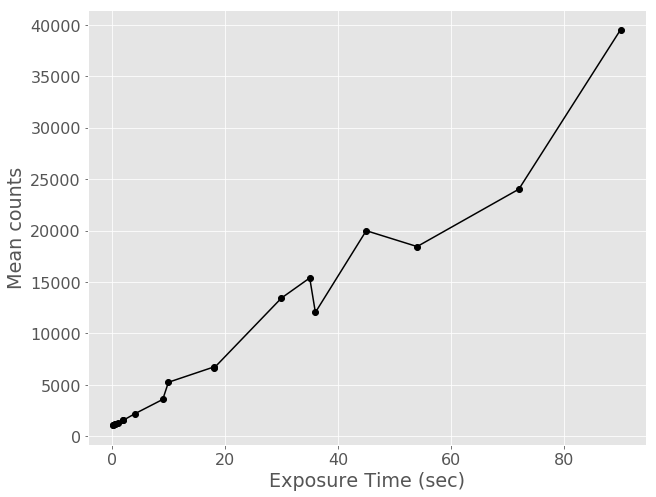

In [35]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(exp_times, means, '-ko')
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean counts')
plt.show()